In [24]:
%matplotlib inline

import numpy as np
from numpy.linalg import inv
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [27]:
#Define Pendulum class here
class DoublePendulum():
    
    """
    Describe Paramteres here
    
    
    ----------
    
    Describe method here
    
    """
    
    def __init__(self,m1=1., m2=1., L1=1., L2=1., g=1.
                ):
        self.m1 = m1
        self.m2 = m2
        self.L1 = L1
        self.L2 = L2
        self.g = g    
        
    def dy_dt(self, t, y):
        
        #Describe what y is: four component vector (4x1)
        phi_1, z1, phi_2, z2 = y
        
        #Define the angles (for convenience)
        cosine = np.cos(phi_1 - phi_2)
        sine = np.sin(phi_1 - phi_2)
        
        #Common denominator between both equations
        denominator = (self.m1 + self.m2 * sine**2)
        
        #Define the z variable
        phi_1_dot = z1
        z1_dot = (self.m2*self.g*np.sin(phi_2)*cosine - self.m2*sine*(self.L1*z1**2*cosine + self.L2*z2**2) - \
                (self.m1 + self.m2)*self.g*np.sin(phi_1)) / (self.L1 * denominator)

        phi_2_dot = z2 
        z2_dot = ((self.m1 + self.m2) * (self.L1*z1**2*sine - self.g*np.sin(phi_2) + self.g*np.sin(phi_1) \
                                       *cosine) + self.m2*self.L2*z2**2*sine*cosine) \
                / (self.L2 * denominator)
        
        
        return phi_1_dot, z1_dot, phi_2_dot, z2_dot
    
    
    def solve_ode(self, t_pts, y0, abserr=1.0e-10, relerr=1.0e-10):
        
        #Describe this method here
        
#         print(y)
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y0, t_eval = t_pts, atol = abserr, rtol = relerr)
        
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y
        
        return phi_1, phi_1_dot, phi_2, phi_2_dot

   

In [28]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line 

In [29]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [30]:
#Labels for plots
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')

In [31]:
#time array
t_start = 0.
t_end = 50. 
delta_t = 0.001

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

In [32]:
#Define variables and instantiate a pendulum 

m1 = 1. 
m2 = 1.
L1 = 1.
L2 = 1.
g = 1. 

#Instantiate 
p1 = DoublePendulum(m1=m1, m2=m2, L1=L1, L2=L2, g=g)

In [33]:
#define initial conditions here

phi_10 = np.pi / 2
phi_10_dot = 0. 
phi_20 = np.pi
phi_20_dot = 0. 

y0 = [phi_10, phi_10_dot, phi_20, phi_20_dot]


phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, y0)


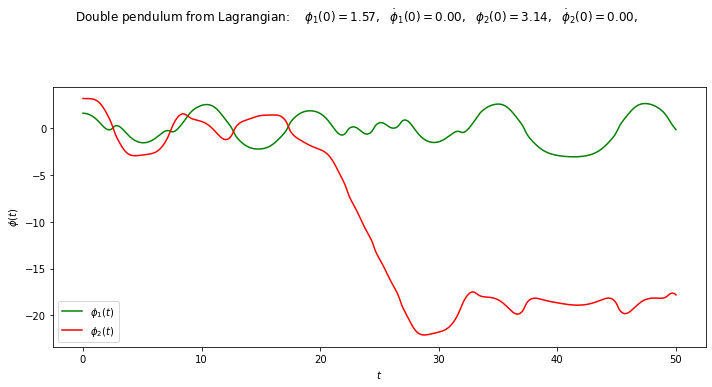

In [34]:
#For plotting now

#To plot: 

fig = plt.figure(figsize=(10,5))

overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_1(0) = {phi_10:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi_10_dot:.2f},$' + \
                rf'  $\phi_2(0) = {phi_20:.2f},$' + \
                rf'  $\dot\phi_2(0) = {phi_20_dot:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_1 = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)


plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
           axis_labels = phi_vs_time_labels,
           color = "green",
           label=r'$\phi_1(t)$',
           ax = ax_1)

plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
           color = "red",
           label=r'$\phi_2(t)$',
           ax = ax_1)

fig.tight_layout()


In [35]:
#Different initial conditions, small angles for the approximation 

In [10]:
#Now, for seeing how delta phi changes - make this latex

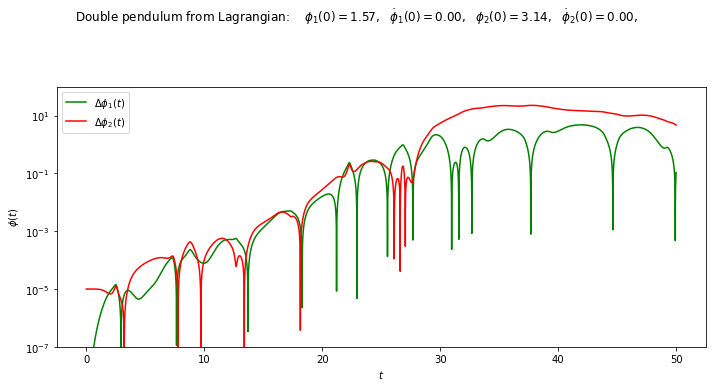

In [16]:
phi_10 = np.pi / 2
phi_10_dot = 0. 
phi_20 = np.pi
phi_20_dot = 0. 


phi_1a, phi_1a_dot, phi_2a, phi_2a_dot = p1.solve_ode(t_pts, phi_10, phi_10_dot, phi_20, phi_20_dot)

phi_1b, phi_1b_dot, phi_2b, phi_2b_dot = p1.solve_ode(t_pts, phi_10, phi_10_dot, phi_20-0.00001, phi_20_dot) 

fig = plt.figure(figsize=(10,5))

overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_1(0) = {phi_10:.2f},$' + \
                rf'  $\dot\phi_1(0) = {phi_10_dot:.2f},$' + \
                rf'  $\phi_2(0) = {phi_20:.2f},$' + \
                rf'  $\dot\phi_2(0) = {phi_20_dot:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

ax_1 = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)



plot_y_vs_x(t_pts[start : stop], np.abs(phi_1a[start : stop] - phi_1b[start : stop]), 
           axis_labels = phi_vs_time_labels,
           color = "green", semilogy=True, 
           label=r'$\Delta\phi_1(t)$',
           ax = ax_1)


plot_y_vs_x(t_pts[start : stop], np.abs(phi_2a[start : stop] - phi_2b[start : stop]), 
           color = "red", semilogy=True, 
           label=r'$\Delta\phi_2(t)$',
           ax = ax_1)

ax_1.set_ylim(1.e-7, 1.e2)

fig.tight_layout()



In [17]:
#Now to animate - turn into latex 

In [19]:
from matplotlib import animation, rc
from IPython.display import HTML 

In [21]:
def xy_coords(x0, y0, theta, L):
    
    """
    Describe method here
    """
    
    x = x0 + L * np.sin(theta)
    y = y0 - L * np.cos(theta)
    
    return x, y

In [23]:
%%capture 
x_min = -3.2 
x_max = -x_min
y_min = -3.2
y_max = -y_min


fig_animation = plt.figure(figsize=(5,5), num='Double Pendulum')
ax_animation = fig_animation.add_subplot(1,1,1)
ax_animation.set_xlim(x_min, x_max)
ax_animation.set_ylim(y_min, y_max)

x0, y0 = 0., 0.

pt0_animation = ax_animation.plot()